In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from scipy import signal

### Example statsmodels code

In [22]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

In [23]:
dta.head()

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0


In [24]:
arma_mod20 = ARIMA(dta, order=(2, 0, 0)).fit()

/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


In [25]:
print(arma_mod20.summary())

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1307.319
Date:                Mon, 12 Apr 2021   AIC                           2622.637
Time:                        16:11:44   BIC                           2637.570
Sample:                    12-31-1700   HQIC                          2628.607
                         - 12-31-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7462      3.938     12.631      0.000      42.027      57.465
ar.L1          1.3906      0.037     37.694      0.000       1.318       1.463
ar.L2         -0.6886      0.036    -19.363      0.0

In [26]:
arma_mod_011 = ARIMA(dta, order=(0, 1, 1)).fit()
print(arma_mod_011.summary())

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1368.639
Date:                Mon, 12 Apr 2021   AIC                           2741.278
Time:                        16:11:44   BIC                           2748.738
Sample:                    12-31-1700   HQIC                          2744.261
                         - 12-31-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4758      0.040     11.774      0.000       0.397       0.555
sigma2       423.4922     26.598     15.922      0.000     371.361     475.623
Ljung-Box (L1) (Q):                   5.89   Jarque-

/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


### CO2 Time Series Data
### (1) ARIMA model with no seasonality

In [27]:
co2_data = pd.read_csv('/home/aumaron/Desktop/other_projects/datasets/TS_CO2_Data.csv')
co2_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1994,363.05,364.18,364.87,364.47,364.32,362.13,356.72,350.88,350.69,356.06,360.09,363.27
1995,363.49,364.94,366.72,366.33,365.75,364.32,358.59,352.06,353.45,357.27,362.34,365.65
1996,366.93,366.71,367.63,368.15,369.14,367.33,361.53,356.11,354.51,360.12,363.85,365.52
1997,367.72,369.08,368.17,368.83,369.49,367.57,360.79,355.16,356.01,360.71,364.77,367.81
1998,369.40,370.12,370.88,370.53,371.56,369.28,364.50,357.46,360.54,364.04,368.74,371.58
1999,372.60,373.85,373.75,374.10,374.50,372.04,364.81,359.11,359.65,364.94,369.82,372.62
2000,373.23,375.13,374.83,375.42,376.18,374.01,366.54,360.78,361.77,367.51,370.58,373.37
2001,375.49,375.94,376.42,377.48,377.67,374.78,367.38,361.67,363.39,367.74,373.18,374.41
2002,376.68,377.42,378.27,378.73,379.01,375.95,370.78,364.07,365.36,370.25,374.04,377.99
2003,379.03,379.36,380.90,381.39,382.38,381.02,373.78,367.97,368.55,372.28,377.75,379.99


In [28]:
# Convert from matrix to vector
co2_vector = co2_data.values.flatten()
co2_vector

array([363.05, 364.18, 364.87, 364.47, 364.32, 362.13, 356.72, 350.88,
       350.69, 356.06, 360.09, 363.27, 363.49, 364.94, 366.72, 366.33,
       365.75, 364.32, 358.59, 352.06, 353.45, 357.27, 362.34, 365.65,
       366.93, 366.71, 367.63, 368.15, 369.14, 367.33, 361.53, 356.11,
       354.51, 360.12, 363.85, 365.52, 367.72, 369.08, 368.17, 368.83,
       369.49, 367.57, 360.79, 355.16, 356.01, 360.71, 364.77, 367.81,
       369.4 , 370.12, 370.88, 370.53, 371.56, 369.28, 364.5 , 357.46,
       360.54, 364.04, 368.74, 371.58, 372.6 , 373.85, 373.75, 374.1 ,
       374.5 , 372.04, 364.81, 359.11, 359.65, 364.94, 369.82, 372.62,
       373.23, 375.13, 374.83, 375.42, 376.18, 374.01, 366.54, 360.78,
       361.77, 367.51, 370.58, 373.37, 375.49, 375.94, 376.42, 377.48,
       377.67, 374.78, 367.38, 361.67, 363.39, 367.74, 373.18, 374.41,
       376.68, 377.42, 378.27, 378.73, 379.01, 375.95, 370.78, 364.07,
       365.36, 370.25, 374.04, 377.99, 379.03, 379.36, 380.9 , 381.39,
      

In [29]:
co2_model_011 = ARIMA(endog=co2_vector, order=(0, 1, 1)).fit()

In [30]:
print(co2_model_011.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  132
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -311.517
Date:                Mon, 12 Apr 2021   AIC                            627.034
Time:                        16:11:45   BIC                            632.785
Sample:                             0   HQIC                           629.371
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6744      0.071      9.494      0.000       0.535       0.814
sigma2         6.7766      0.797      8.508      0.000       5.215       8.338
Ljung-Box (L1) (Q):                   7.13   Jarque-

### (2) ARIMA model with seasonal and non-seasonal components

In [31]:
co2_composite_model_011 = ARIMA(endog=co2_vector, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12)).fit()

print(co2_composite_model_011.summary())

### Code for out-of-sample forecasting & corresponding confidence interval

In [32]:
# Option 1: Predict the next 12 values by choosing '132' as the start index for out-of-sample prediction
predict_co2 = co2_composite_model_011.predict(132, 132+12)

In [33]:
predict_co2

array([382.88008831, 383.5531236 , 383.92927625, 384.55873587,
       385.05191543, 383.07277951, 376.3312297 , 370.33059759,
       371.09032469, 375.74949158, 380.37360261, 383.12802228,
       384.68012434])

In [34]:
# Option 2: Forecasting based on 'forecast' function in ARIMAResults
predict_co2_oos = co2_composite_model_011.forecast(steps=12)

In [35]:
predict_co2_oos

array([382.88008831, 383.5531236 , 383.92927625, 384.55873587,
       385.05191543, 383.07277951, 376.3312297 , 370.33059759,
       371.09032469, 375.74949158, 380.37360261, 383.12802228])

In [36]:
# Option 3: Perform forecasting using  ARIMAResults object with confidence interval
predict_co2_PI_oos = co2_composite_model_011.get_forecast(steps=12)

In [37]:
predict_co2_PI_oos.predicted_mean

array([382.88008831, 383.5531236 , 383.92927625, 384.55873587,
       385.05191543, 383.07277951, 376.3312297 , 370.33059759,
       371.09032469, 375.74949158, 380.37360261, 383.12802228])

In [38]:
# Results are identical to those obtained using 'forecast'
np.all(predict_co2_PI_oos.predicted_mean == predict_co2_oos)

True

In [39]:
# 95% confidence interval for each of the 12 predicted values
predict_co2_PI_oos.conf_int(alpha=0.05)

array([[381.42939551, 384.33078111],
       [381.97935859, 385.12688861],
       [382.24138911, 385.61716339],
       [382.76396856, 386.35350319],
       [383.15628455, 386.9475463 ],
       [381.08138726, 385.06417177],
       [374.24847436, 378.41398504],
       [368.16032191, 372.50087326],
       [368.83592384, 373.34472555],
       [373.41399379, 378.08498936],
       [377.95973091, 382.78747432],
       [380.63824251, 385.61780205]])

### In-sample vs. OOS forecasting

In [40]:
co2_model_100 = ARIMA(endog=co2_vector, order=(1, 0, 0)).fit()
print(co2_model_100.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  132
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -348.791
Date:                Mon, 12 Apr 2021   AIC                            703.581
Time:                        16:11:48   BIC                            712.229
Sample:                             0   HQIC                           707.095
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        369.4554      3.506    105.381      0.000     362.584     376.327
ar.L1          0.9024      0.040     22.420      0.000       0.823       0.981
sigma2        11.4055      1.818      6.273      0.0

In [41]:
# In-sample dynamic = TRUE; forecasted values are used for stepwise prediction
predict_co2_dynamic_true = co2_model_100.predict(122, 131, dynamic=True)

# In-sample dynamic = False; actual values are used for stepwise prediction
predict_co2_dynamic_false = co2_model_100.predict(122, 131, dynamic=False)

In [42]:
predict_co2_dynamic_true

array([381.10028051, 379.96353191, 378.93775007, 378.01210266,
       377.17681481, 376.42306581, 375.74289605, 375.12912287,
       374.5752648 , 374.07547307])

In [43]:
predict_co2_dynamic_false

array([381.10028051, 380.3964223 , 381.86730549, 382.20118695,
       381.30782844, 374.07974603, 368.76471415, 368.63838062,
       373.00591107, 377.60806092])

In [44]:
co2_vector[122]

381.58

In [45]:
# 122 (0-indexed) true value used to predict value at 123
369.4554 + 0.9024*(co2_vector[122] - 369.4554)

380.39663903999997

In [46]:
# 122 (0-indexed) forecasted value used to predict value at 123
369.4554 + 0.9024*(381.10028051 - 369.4554)

379.963740172224

### Use of periodogram to estimate the periodicity in the data
### (1) De-trend  linear data

In [47]:
f, Pxx_den = signal.periodogram(x=co2_vector, detrend='linear')

In [52]:
Pxx_den

array([3.58391079e-25, 4.98223878e+00, 1.03645360e+01, 1.72919350e+01,
       6.49037104e+00, 5.23624879e+00, 1.10278251e+00, 7.24743431e-01,
       1.00557765e+00, 2.34958345e+00, 3.67225230e+00, 3.01756372e+03,
       1.54608394e-01, 5.10719025e-01, 1.21965957e+00, 1.13832319e-02,
       9.06348696e-01, 9.09899917e-01, 3.56919562e-01, 1.54766407e+00,
       3.13673403e-01, 2.98412098e+00, 5.67229235e+02, 3.86992451e-01,
       9.54063953e-01, 1.40138078e+00, 1.63317883e-01, 1.00375742e-02,
       8.29218916e-02, 3.65079476e-01, 1.43317379e+00, 4.95480438e-01,
       5.48345932e-01, 5.24430122e+01, 1.75713360e+00, 1.80488654e-01,
       4.36125989e-01, 6.03370282e-01, 5.77749380e-02, 9.09551769e-01,
       8.93517065e-01, 5.75352648e-01, 4.01318226e-01, 5.79502665e-02,
       2.48840288e+00, 7.52566640e-02, 2.94142009e-01, 1.07526008e+00,
       7.82275857e-01, 1.66194795e-01, 1.61572794e+00, 7.08496038e-01,
       8.44974040e-01, 3.57749947e-01, 4.62352258e-02, 1.81045796e-01,
      

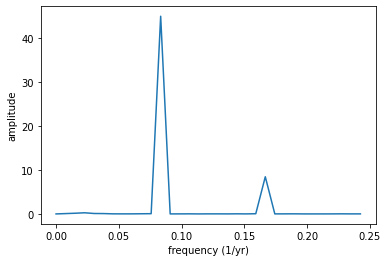

In [55]:
plt.plot(f[:len(Pxx_den)//2], np.abs(Pxx_den[:len(Pxx_den)//2])/len(Pxx_den));
plt.xlabel('frequency (1/yr)')
plt.ylabel('amplitude');

In [51]:
f[Pxx_den.argmax()]

0.08333333333333334

In [ ]:
len(co2_vector)/2

In [ ]:
len(f)

In [ ]:
len(Pxx_den)

In [ ]:
Pxx_den[0:20]

In [16]:
np.where(Pxx_den == Pxx_den.max())[0][0]

11

In [57]:
# Periodicity
1/0.08333333333333334

11.999999999999998

### (2) Linear de-trending is not performed

In [ ]:
f_no_trend, Pxx_den_no_trend = signal.periodogram(x=co2_vector)

In [ ]:
np.where(Pxx_den_no_trend == Pxx_den_no_trend.max())[0][0]

In [ ]:
1/f[1]